# Coral Bleaching
## Predicting the Likelihood and Severity of Coral Reef Bleaching Events Based on Various Environmental Factors

Authors: Jaimie Chin & Maro Aboelwafa  
Course: DS.UA.301 - Advanced Topics in Data Science: Machine Learning for Climate Change  
Date: 22 March 2023  

## Background
The climate issue we are tackling is predicting the likelihood and severity of coral reef bleaching events based on various environmental factors. Coral reefs are sensitive to environmental changes such as temperature, salinity, nutrient levels and water acidity. When these factors reach certain thresholds, they  trigger coral bleaching, a process in which the coral expels the symbiotic algae that live on it, causing the coral to turn white and possibly die.

To address this, we aim to use machine learning to analyze datasets of environmental data, such as water temperature to develop algorithms that can predict the likelihood and severity of coral bleaching events.

### Data 
We will be using the Bleaching and environmental data for global coral reef sites (1980-2020) from the Biological & Chemical Oceanography Data Management Office. The data includes information on the presence and absence of coral bleaching, allowing comparative analyses and the determination of geographical bleaching thresholds, together with site exposure, distance to land, mean turbidity, cyclone frequency, and a suite of sea-surface temperature metrics at the times of survey. 

Data Server: [Bleaching and Environmental Data](http://dmoserv3.whoi.edu/jg/info/BCO-DMO/Coral_Reef_Brightspots/bleaching_and_env_data%7Bdir=dmoserv3.whoi.edu/jg/dir/BCO-DMO/Coral_Reef_Brightspots/,data=dmoserv3.bco-dmo.org:80/jg/serv/BCO-DMO/Coral_Reef_Brightspots/global_bleaching_environmental.brev0%7D?)


## Import Packages

In [20]:
# Import packages & libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load Dataset 

In [3]:
# Import Global Bleaching & Environmental Data 
data_path = "data/global_bleaching_environmental.csv"
types = {'Distance_to_Shore': float, 'Turbidity': float, 'Percent_Bleaching': float}
bleach_df = pd.read_csv(data_path, sep='\s*[,]\s*', engine='python', na_values=['nd'], dtype=types)

In [4]:
# View sample of the data 
bleach_df.sample(5)

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
7935,1958,10308053,Reef_Check,10.7378,103.1977,Pacific,103.181067E.10.737813N,Central Indo-Pacific,Gulf of Thailand,Cambodia,...,8.2,1.0,0.00,1.70,13.37,0.53,2013-04-20,NaN,NaN,NaN
692,1380,10323488,Donner,13.1880,-59.6420,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,Barbados,...,6.0,0.0,2.07,0.81,6.97,0.20,2005-10-15,NaN,NaN,NaN
28246,3577,10314537,Reef_Check,-16.5427,-151.7408,Pacific,151.44.447W.16.32.562S,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,7.0,1.0,0.00,1.05,8.97,0.36,2012-09-03,NaN,NaN,NaN
856,8572,10327860,Donner,18.3580,-65.0330,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,2.73,0.74,6.78,0.22,2005-09-15,NaN,NaN,NaN
17244,6699,10319092,Reef_Check,12.0745,-68.8792,Atlantic,68.52.45.1W.12.4.28.3N,Tropical Atlantic,Netherlands Antilles and south Caribbean,Netherlands Antilles,...,6.0,0.0,0.00,0.88,7.65,0.26,2008-04-12,NaN,NaN,NaN


## Data Cleaning & Exploration
* Distributions of each attribute 
* Visualizations
* Correlation Matrix 


In [5]:
# Let's first see how large our dataset is for evaluation 
bleach_df.shape

(41361, 62)

### Feature Information & Null Values 
Let's observe our features to determine what could be used in our model analysis

In [33]:
# Let's see out features and datatypes 
bleach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                28821 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41358 non-null  object 
 9   Country_Name                           41360 non-null  object 
 10  State_Island_Province_Name             41262 non-null  object 
 11  Ci

In [42]:
# Let's see our null values for each feature 
# Number of missing data within each attribute
null_df = pd.DataFrame(bleach_df.isna().sum(), columns=['Null_Count'])
null_df[null_df['Null_Count'] != 0]

,Null_Count
Reef_ID,12540
Ecoregion_Name,3
Country_Name,1
State_Island_Province_Name,99
City_Town_Name,1133
Site_Name,34429
Distance_to_Shore,2
Turbidity,6
Depth_m,1799
Substrate_Name,12668


Looking at the number of null values for each feature, our target feature **Percent_Bleaching** have a higher number of null values than we would like. For better accuracy and generalizability, we may decide to drop all samples that do not have our target feature

Otherwise, looking at the other null values, it seems that there are some features that can be dropped due to its irrelevancy within Coral Bleaching literature, and some features that can use imputed score. How we will impute these scores will be determined. 

### Distributions & Visualizations

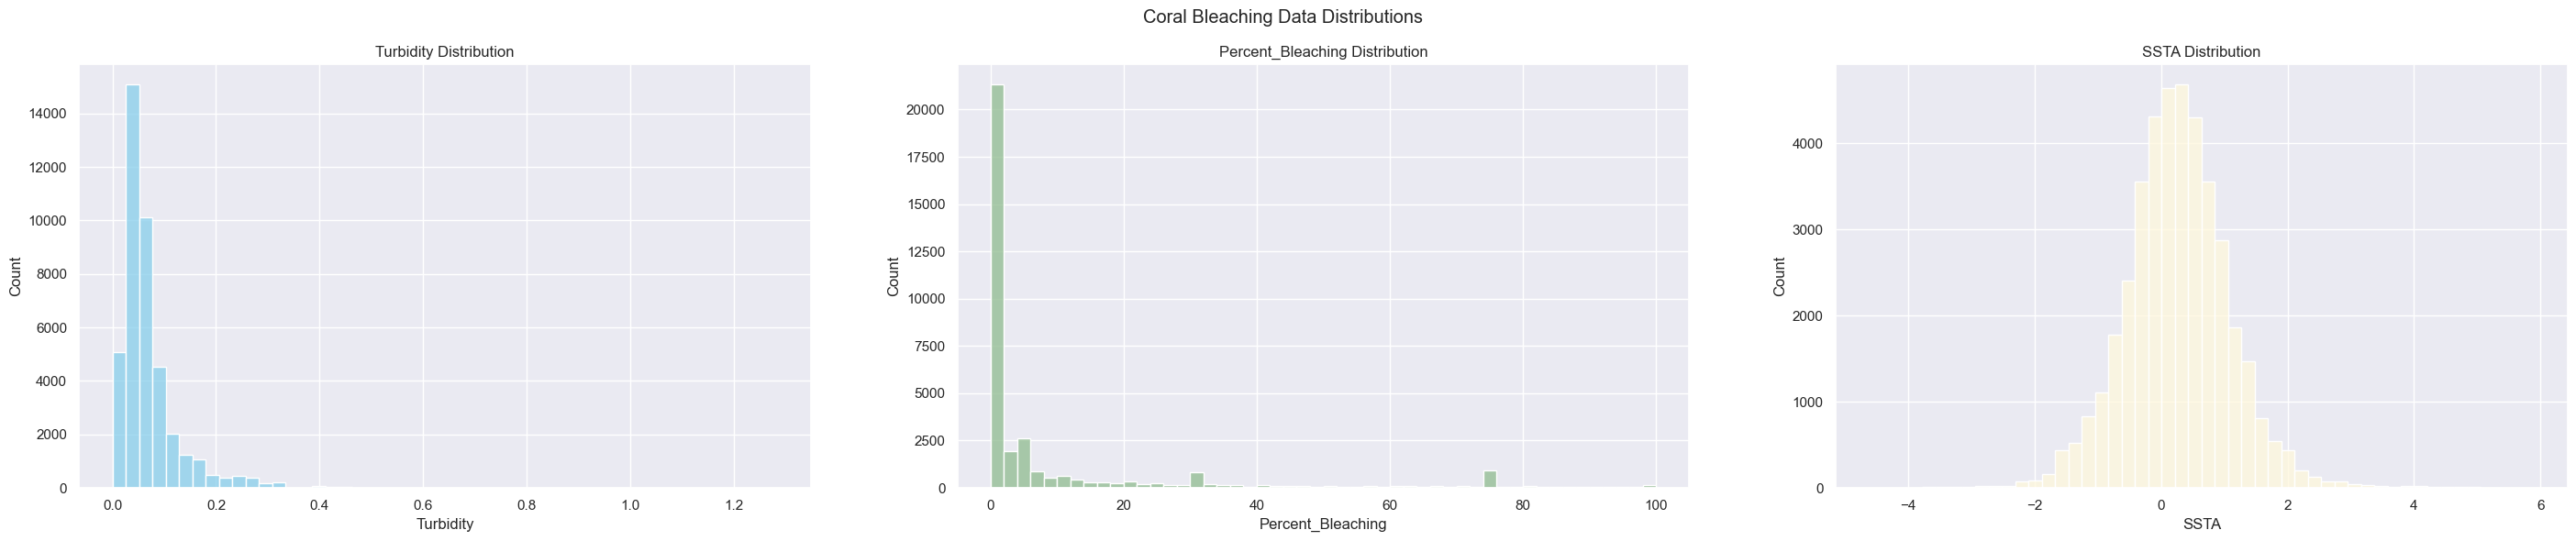

In [60]:
# Set seaborn figure
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(35, 6))

# Plotting some relevant features 
fig.suptitle('Coral Bleaching Data Distributions')

sns.histplot(data=bleach_df, x="Turbidity", color="skyblue", bins=50, ax=axs[0])
axs[0].set_title('Turbidity Distribution')

sns.histplot(data=bleach_df, x="Percent_Bleaching", color="darkseagreen", bins=50, ax=axs[1])
axs[1].set_title('Percent_Bleaching Distribution')

sns.histplot(data=bleach_df, x="SSTA", color="cornsilk", bins=50, ax=axs[2])
axs[2].set_title('SSTA Distribution')

plt.show()

## Feature Selection
* Adding, Dropping Features of Importance 
* Encoding Features 
* Discard Unnecessary Features 
* Impute missing information if necessary

### Adding, Dropping Features of Importance

## Model Implementation
* Random Forest
* Gradient Boosting 
* ANN

## Evaluation & Analysis 
* Accuracy
* Precision
* Recall
* F1 score 

## Optimization
* Cross-Validation
* Grid-Search

## Final Evaluation & Analysis
* Accuracy
* Precision
* Recall
* F1 score 

## Final Visualizations 
* Plot coral bleaching severity?